In [1]:
import pandas as pd

data = pd.read_csv('itamplify_train.csv')
print(data.describe())
print(data.columns)

                   X   popularity   duration_ms     explicit  danceability  \
count    8266.000000  8266.000000  8.266000e+03  8266.000000   8266.000000   
mean    54169.487902    48.838253  2.457282e+05     0.077789      0.604831   
std     35759.706697    15.213626  1.212351e+05     0.267855      0.155774   
min      1000.000000    25.000000  3.062200e+04     0.000000      0.000000   
25%     25473.250000    37.000000  1.871610e+05     0.000000      0.496000   
50%     50203.500000    46.000000  2.221195e+05     0.000000      0.616000   
75%     89761.750000    61.000000  2.742560e+05     0.000000      0.721000   
max    109999.000000    99.000000  2.959346e+06     1.000000      0.975000   

            energy          key     loudness         mode  speechiness  \
count  8266.000000  8266.000000  8266.000000  8266.000000  8266.000000   
mean      0.649814     5.336075    -8.056644     0.604041     0.082357   
std       0.213768     3.541447     3.886246     0.489085     0.088073   
m

In [2]:
data.time_signature.value_counts()

4    7541
3     508
5     140
1      76
0       1
Name: time_signature, dtype: int64

samba          0.117832
techno         0.105129
psych-rock     0.103920
folk           0.092669
disco          0.083716
funk           0.076095
blues          0.072828
hip-hop        0.069320
heavy-metal    0.050569
reggaeton      0.045004
alternative    0.043310
afrobeat       0.041253
country        0.035325
jazz           0.032664
classical      0.030365
Name: track_genre, dtype: float64


<AxesSubplot: xlabel='track_genre'>

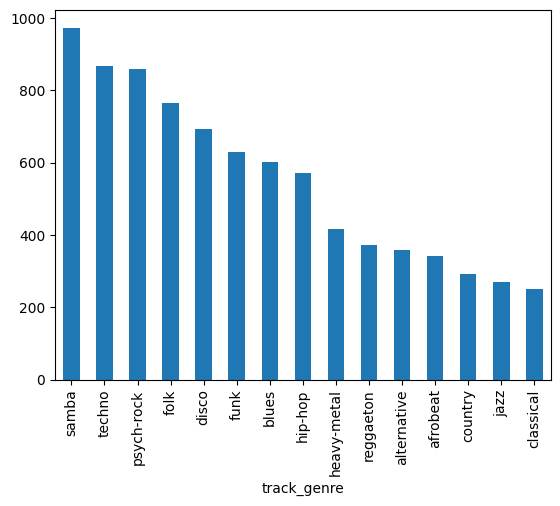

In [3]:
print(data['track_genre'].value_counts(normalize=True))
data.value_counts('track_genre').plot(kind='bar')

Tenemos clases desbalanceadas entonces vamos a tener que ajustar nuestra función de pérdida en nuestro mmodelo

<AxesSubplot: >

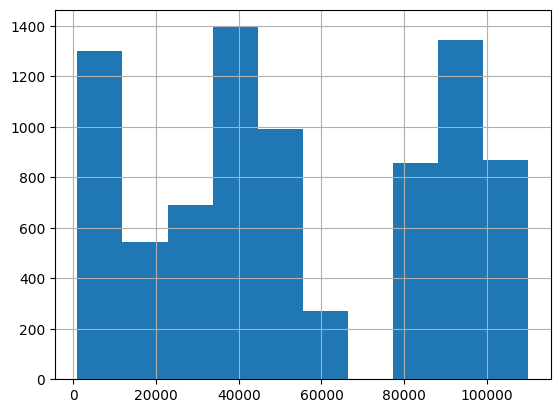

In [4]:
data.X.hist()

array([[<AxesSubplot: title={'center': 'X'}>,
        <AxesSubplot: title={'center': 'popularity'}>,
        <AxesSubplot: title={'center': 'duration_ms'}>,
        <AxesSubplot: title={'center': 'explicit'}>],
       [<AxesSubplot: title={'center': 'danceability'}>,
        <AxesSubplot: title={'center': 'energy'}>,
        <AxesSubplot: title={'center': 'key'}>,
        <AxesSubplot: title={'center': 'loudness'}>],
       [<AxesSubplot: title={'center': 'mode'}>,
        <AxesSubplot: title={'center': 'speechiness'}>,
        <AxesSubplot: title={'center': 'acousticness'}>,
        <AxesSubplot: title={'center': 'instrumentalness'}>],
       [<AxesSubplot: title={'center': 'liveness'}>,
        <AxesSubplot: title={'center': 'valence'}>,
        <AxesSubplot: title={'center': 'tempo'}>,
        <AxesSubplot: title={'center': 'time_signature'}>]], dtype=object)

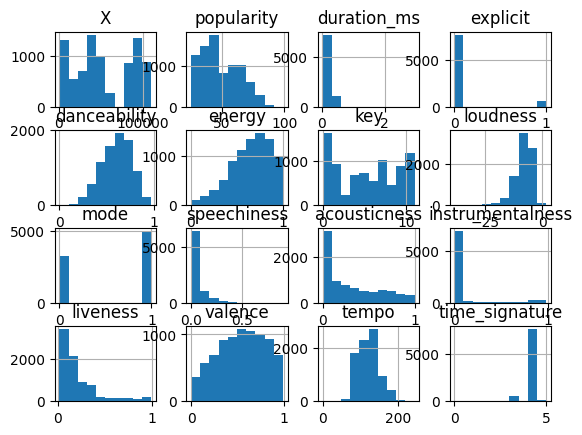

In [5]:
# plot all columns
data.hist()

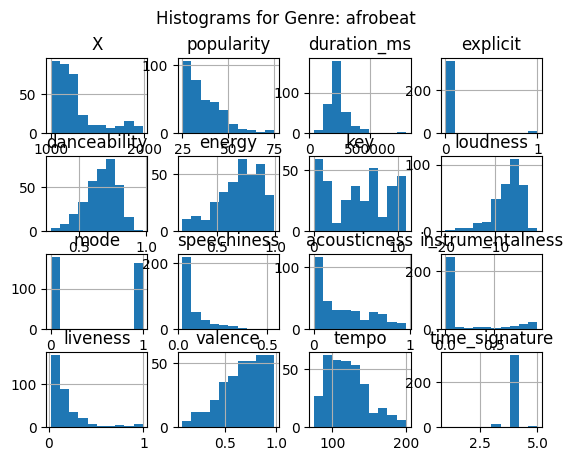

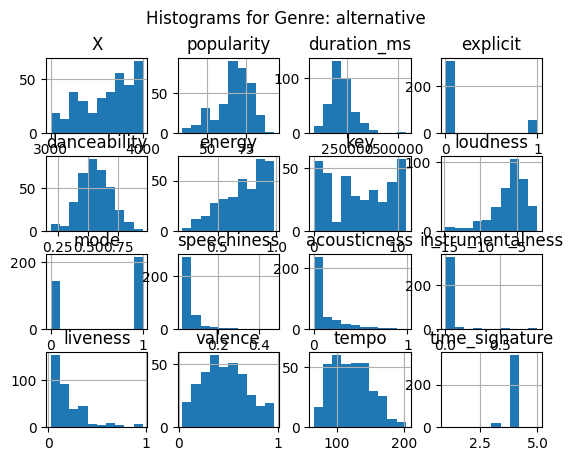

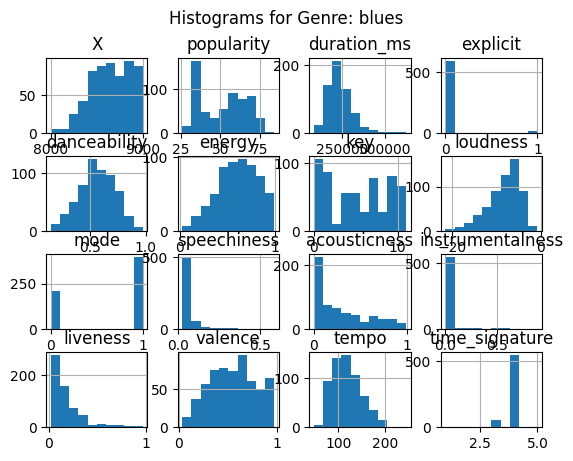

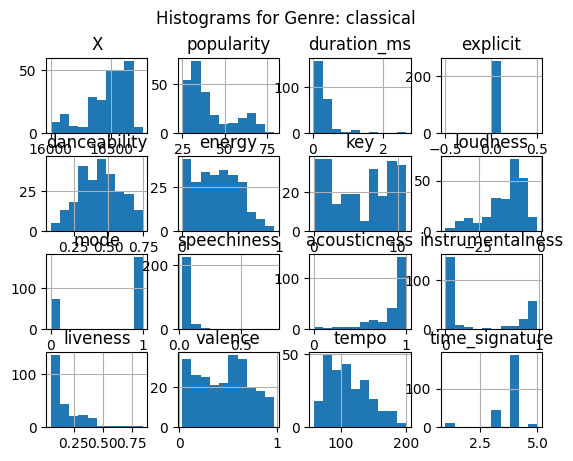

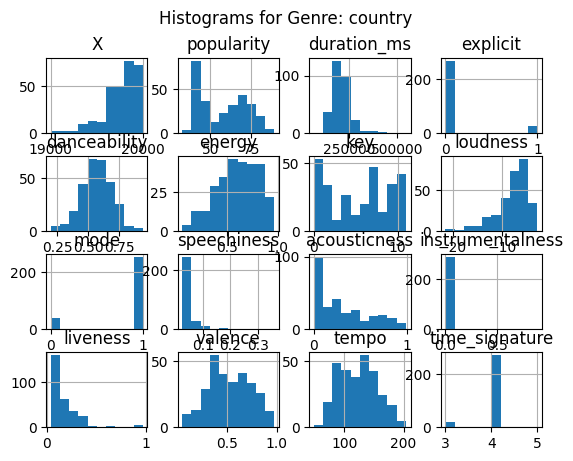

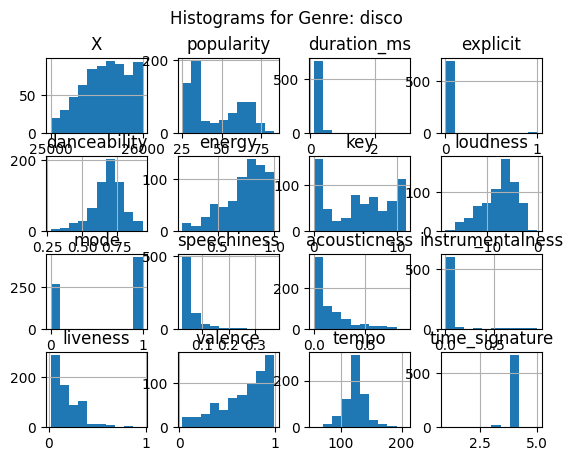

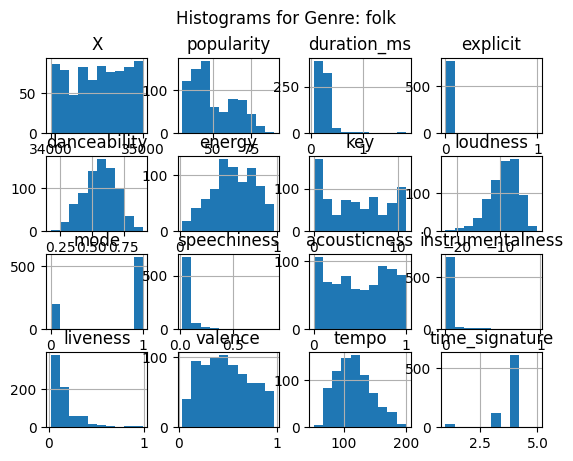

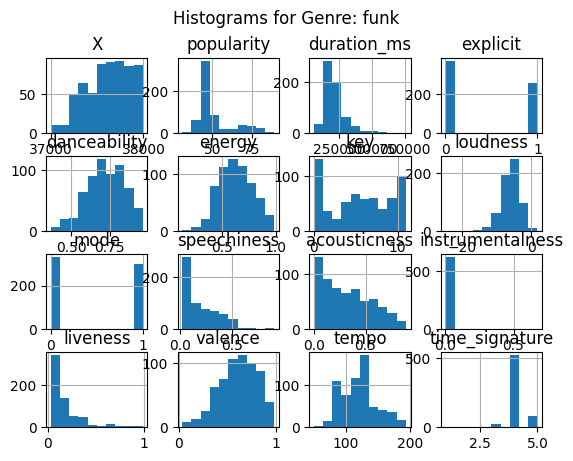

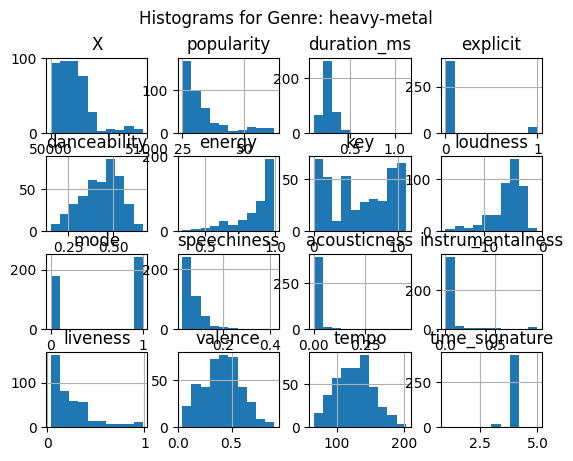

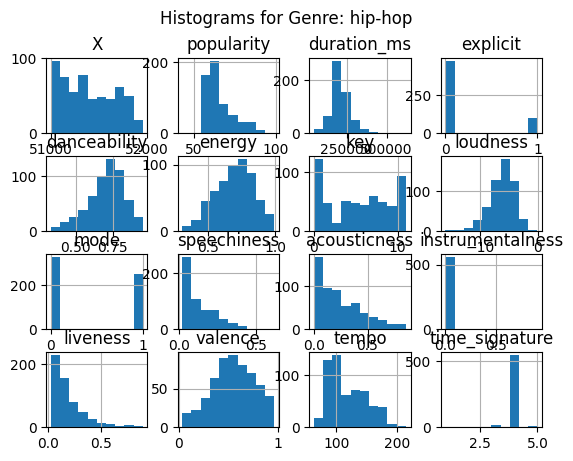

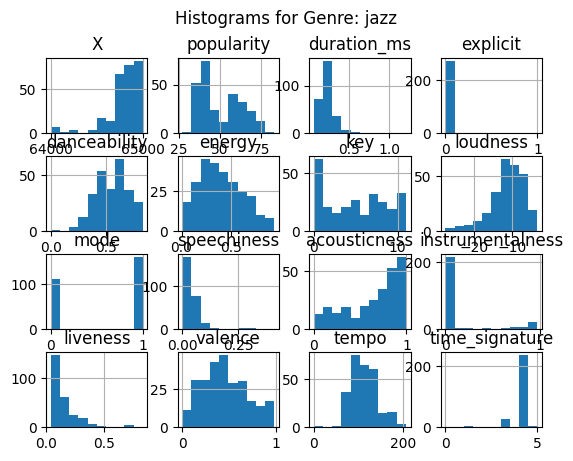

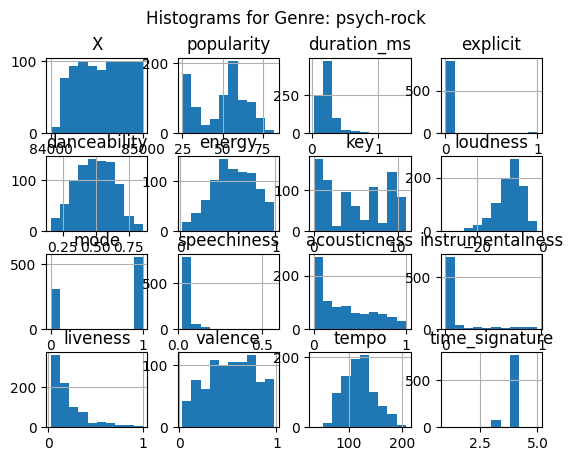

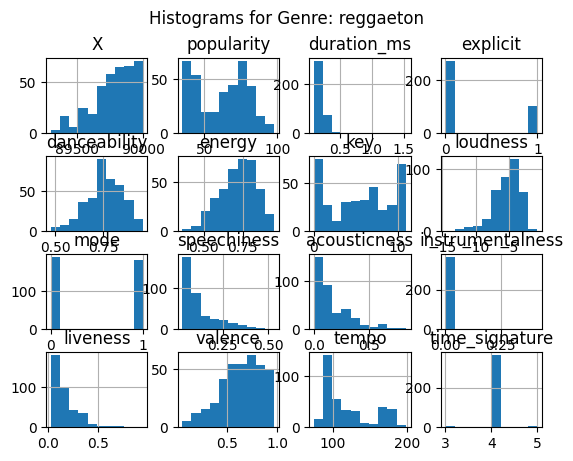

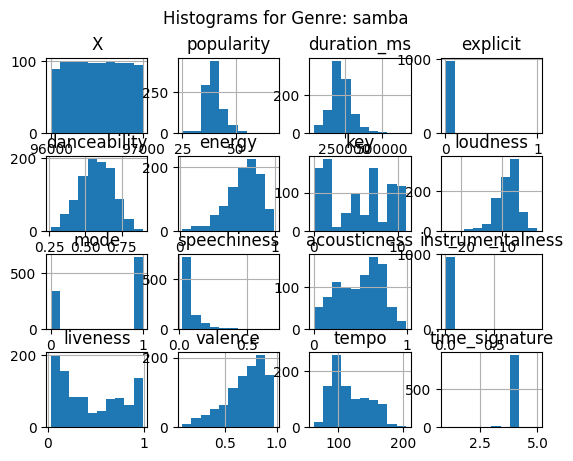

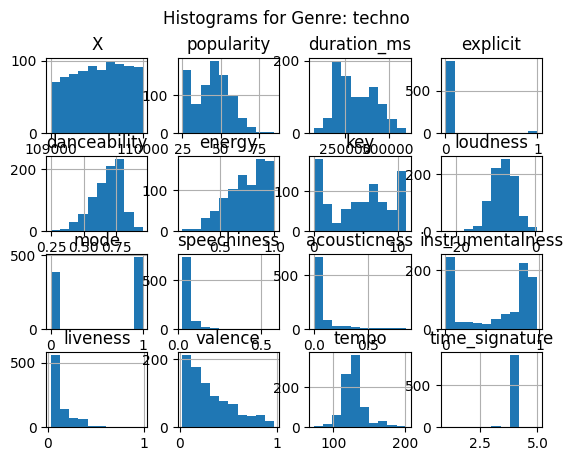

In [6]:
import matplotlib.pyplot as plt
# get all track_genre values
categories = data['track_genre'].unique()
for cat in categories: 
    data[data['track_genre'] == cat].hist()
    plt.suptitle(f'Histograms for Genre: {cat}')


In [7]:
from sklearn.model_selection import train_test_split

data = pd.read_csv('itamplify_train.csv')

train, test = train_test_split(data, 
                                stratify=data['track_genre'],
                                test_size=0.2,
                                random_state=42)

train, val = train_test_split(train,
                                stratify=train['track_genre'],
                                test_size=0.2,
                                random_state=42)



**`train_data` dataset summary**

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dtypes,missing_count,missing_ratio,raw_type,variable_type,special_types
X,6612,6612,,,54167.310042,35762.332388,1000.0,25474.75,50201.5,89765.25,109999.0,int64,,,int,numeric,
acousticness,6612,2316,,,0.308964,0.298602,0.000002,0.034075,0.213,0.548,0.996,float64,,,float,numeric,
album_name,6612,4681,1 (Remastered),23,,,,,,,,object,,,object,category,text
artists,6612,3217,The Beatles,125,,,,,,,,object,,,object,category,
danceability,6612,750,,,0.603912,0.155471,0.0,0.496,0.615,0.72,0.974,float64,,,float,numeric,
duration_ms,6612,5897,,,244070.630369,113897.30633,37132.0,186773.0,221650.5,272997.0,2544561.0,int64,,,int,numeric,
energy,6612,941,,,0.647956,0.214946,0.00532,0.505,0.675,0.82,0.999,float64,,,float,numeric,
explicit,6612,2,,,0.077586,0.26754,0.0,0.0,0.0,0.0,1.0,int64,,,int,category,
instrumentalness,6612,2499,,,0.109879,0.261595,0.0,0.0,0.000022,0.008305,0.981,float64,,,float,numeric,
key,6612,12,,,5.344071,3.538714,0.0,2.0,5.0,9.0,11.0,int64,,,int,category,


**`test_data` dataset summary**

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dtypes,missing_count,missing_ratio,raw_type,variable_type,special_types
X,1654,1654,,,54178.194075,35760.020415,1001.0,25469.25,50210.0,89756.75,109993.0,int64,,,int,numeric,
acousticness,1654,1137,,,0.296191,0.294763,0.000007,0.026825,0.201,0.5155,0.995,float64,,,float,numeric,
album_name,1654,1452,Moosetape,7,,,,,,,,object,,,object,category,text
artists,1654,1149,The Beatles,24,,,,,,,,object,,,object,category,
danceability,1654,590,,,0.608504,0.156969,0.152,0.499,0.6205,0.723,0.975,float64,,,float,numeric,
duration_ms,1654,1604,,,252354.511487,146807.150486,30622.0,188187.0,223909.5,278889.75,2959346.0,int64,,,int,numeric,
energy,1654,679,,,0.657241,0.20889,0.00464,0.51925,0.688,0.821,1.0,float64,,,float,numeric,
explicit,1654,2,,,0.078597,0.269191,0.0,0.0,0.0,0.0,1.0,int64,,,int,category,
instrumentalness,1654,902,,,0.113575,0.266604,0.0,0.0,0.000022,0.008535,0.978,float64,,,float,numeric,
key,1654,12,,,5.304111,3.553245,0.0,2.0,5.0,8.0,11.0,int64,,,int,category,


### Feature Distance

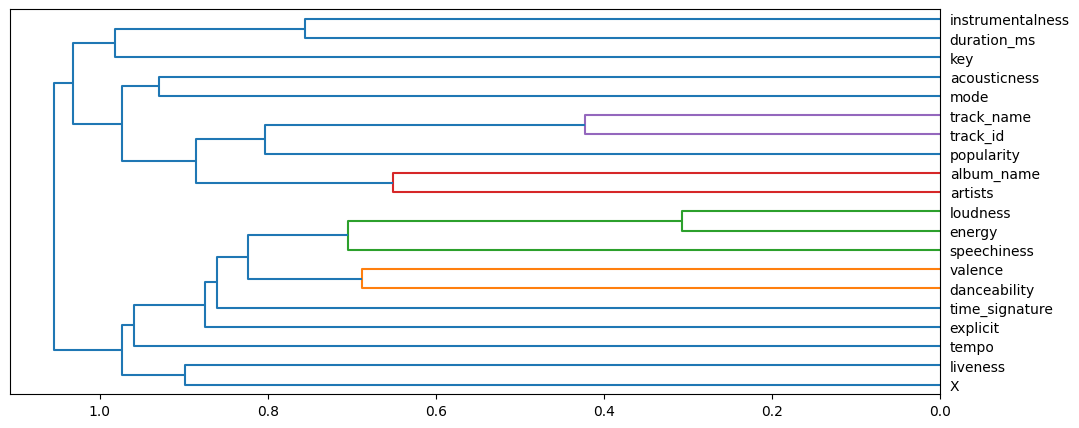

In [8]:
import autogluon.eda.auto as auto

all_train = pd.concat([train, val], ignore_index=True).copy()

eda_overview = auto.dataset_overview(train_data=all_train, test_data=test, 
                      label='track_genre')

## Target variable analysis

### Label Insights

 - Mild minority class imbalance detected - imbalance ratio is `25.80%`. Recommendations:
   - downsample majority class `samba` to improve the balance
   - upweight downsampled class so that `sample_weight = original_weight x downsampling_factor`.[TabularPredictor](https://auto.gluon.ai/stable/api/autogluon.predictor.html#module-0) supports this via `sample_weight` parameter

,count,unique,top,freq,dtypes,missing_count,missing_ratio,raw_type,special_types
track_genre,6612,15,samba,779,object,,,object,


,count,unique,top,freq,dtypes,missing_count,missing_ratio,raw_type,special_types
track_genre,1654,15,samba,195,object,,,object,


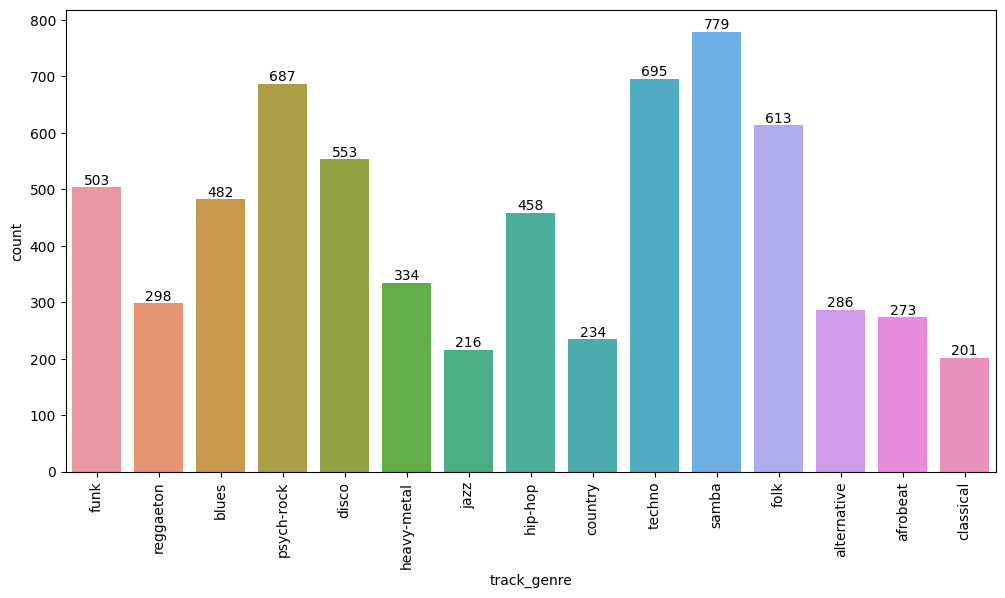

### Target variable correlations
 - ⚠️ no fields with absolute correlation greater than `0.5` found for target variable `track_genre`.

In [9]:
columns_to_drop = ['track_name', 'track_id', 'artists', 'album_name', 'X']

all_train = all_train.drop(columns=columns_to_drop)
test = test.drop(columns=columns_to_drop)

auto.target_analysis(train_data=all_train, test_data=test, label='track_genre')

---

# EDA a Mano

In [10]:
all_train['mode'].value_counts()

1    3978
0    2634
Name: mode, dtype: int64

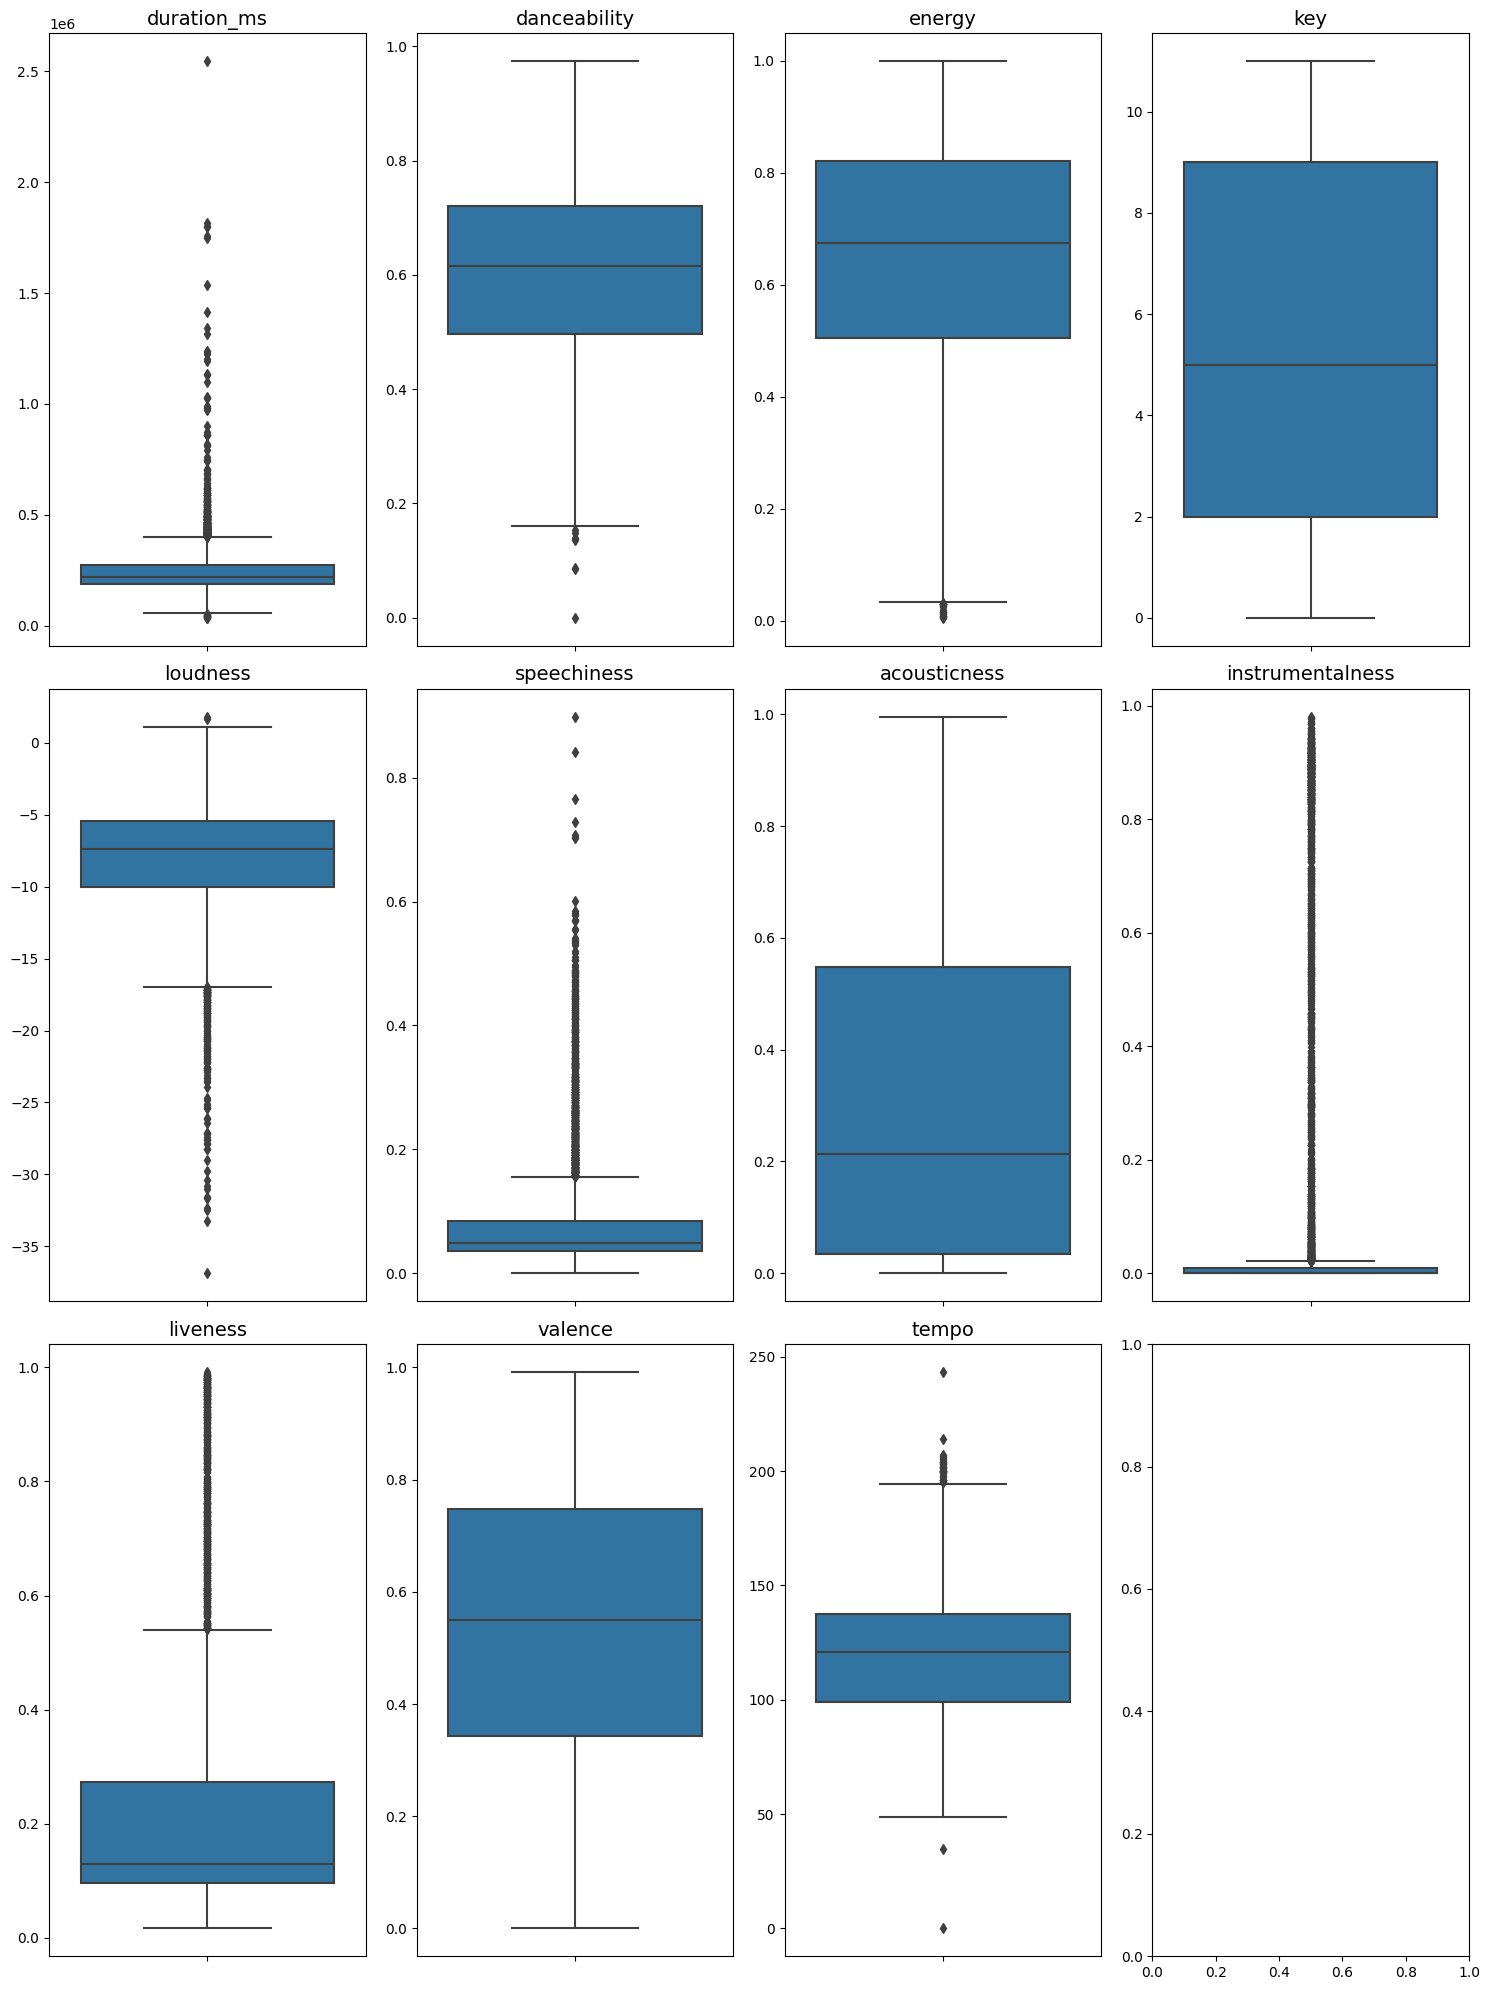

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variables to plot
variables_to_plot = ['duration_ms', 'danceability', 'energy', 'key',
                      'loudness', 'speechiness', 'acousticness', 'instrumentalness', 
                      'liveness', 'valence', 'tempo']

# Setting up the figure and axes
fig, ax = plt.subplots(3, 4, figsize=(15, 20))

# Flattening the axis array for easier iteration
ax = ax.flatten()

# Creating boxplots for each variable
for i, var in enumerate(variables_to_plot):
    sns.boxplot(y=all_train[var], ax=ax[i])
    ax[i].set_title(var, fontsize=14)
    ax[i].set_ylabel('')  # Clear the y-axis label to prevent clutter

plt.tight_layout()
plt.show()


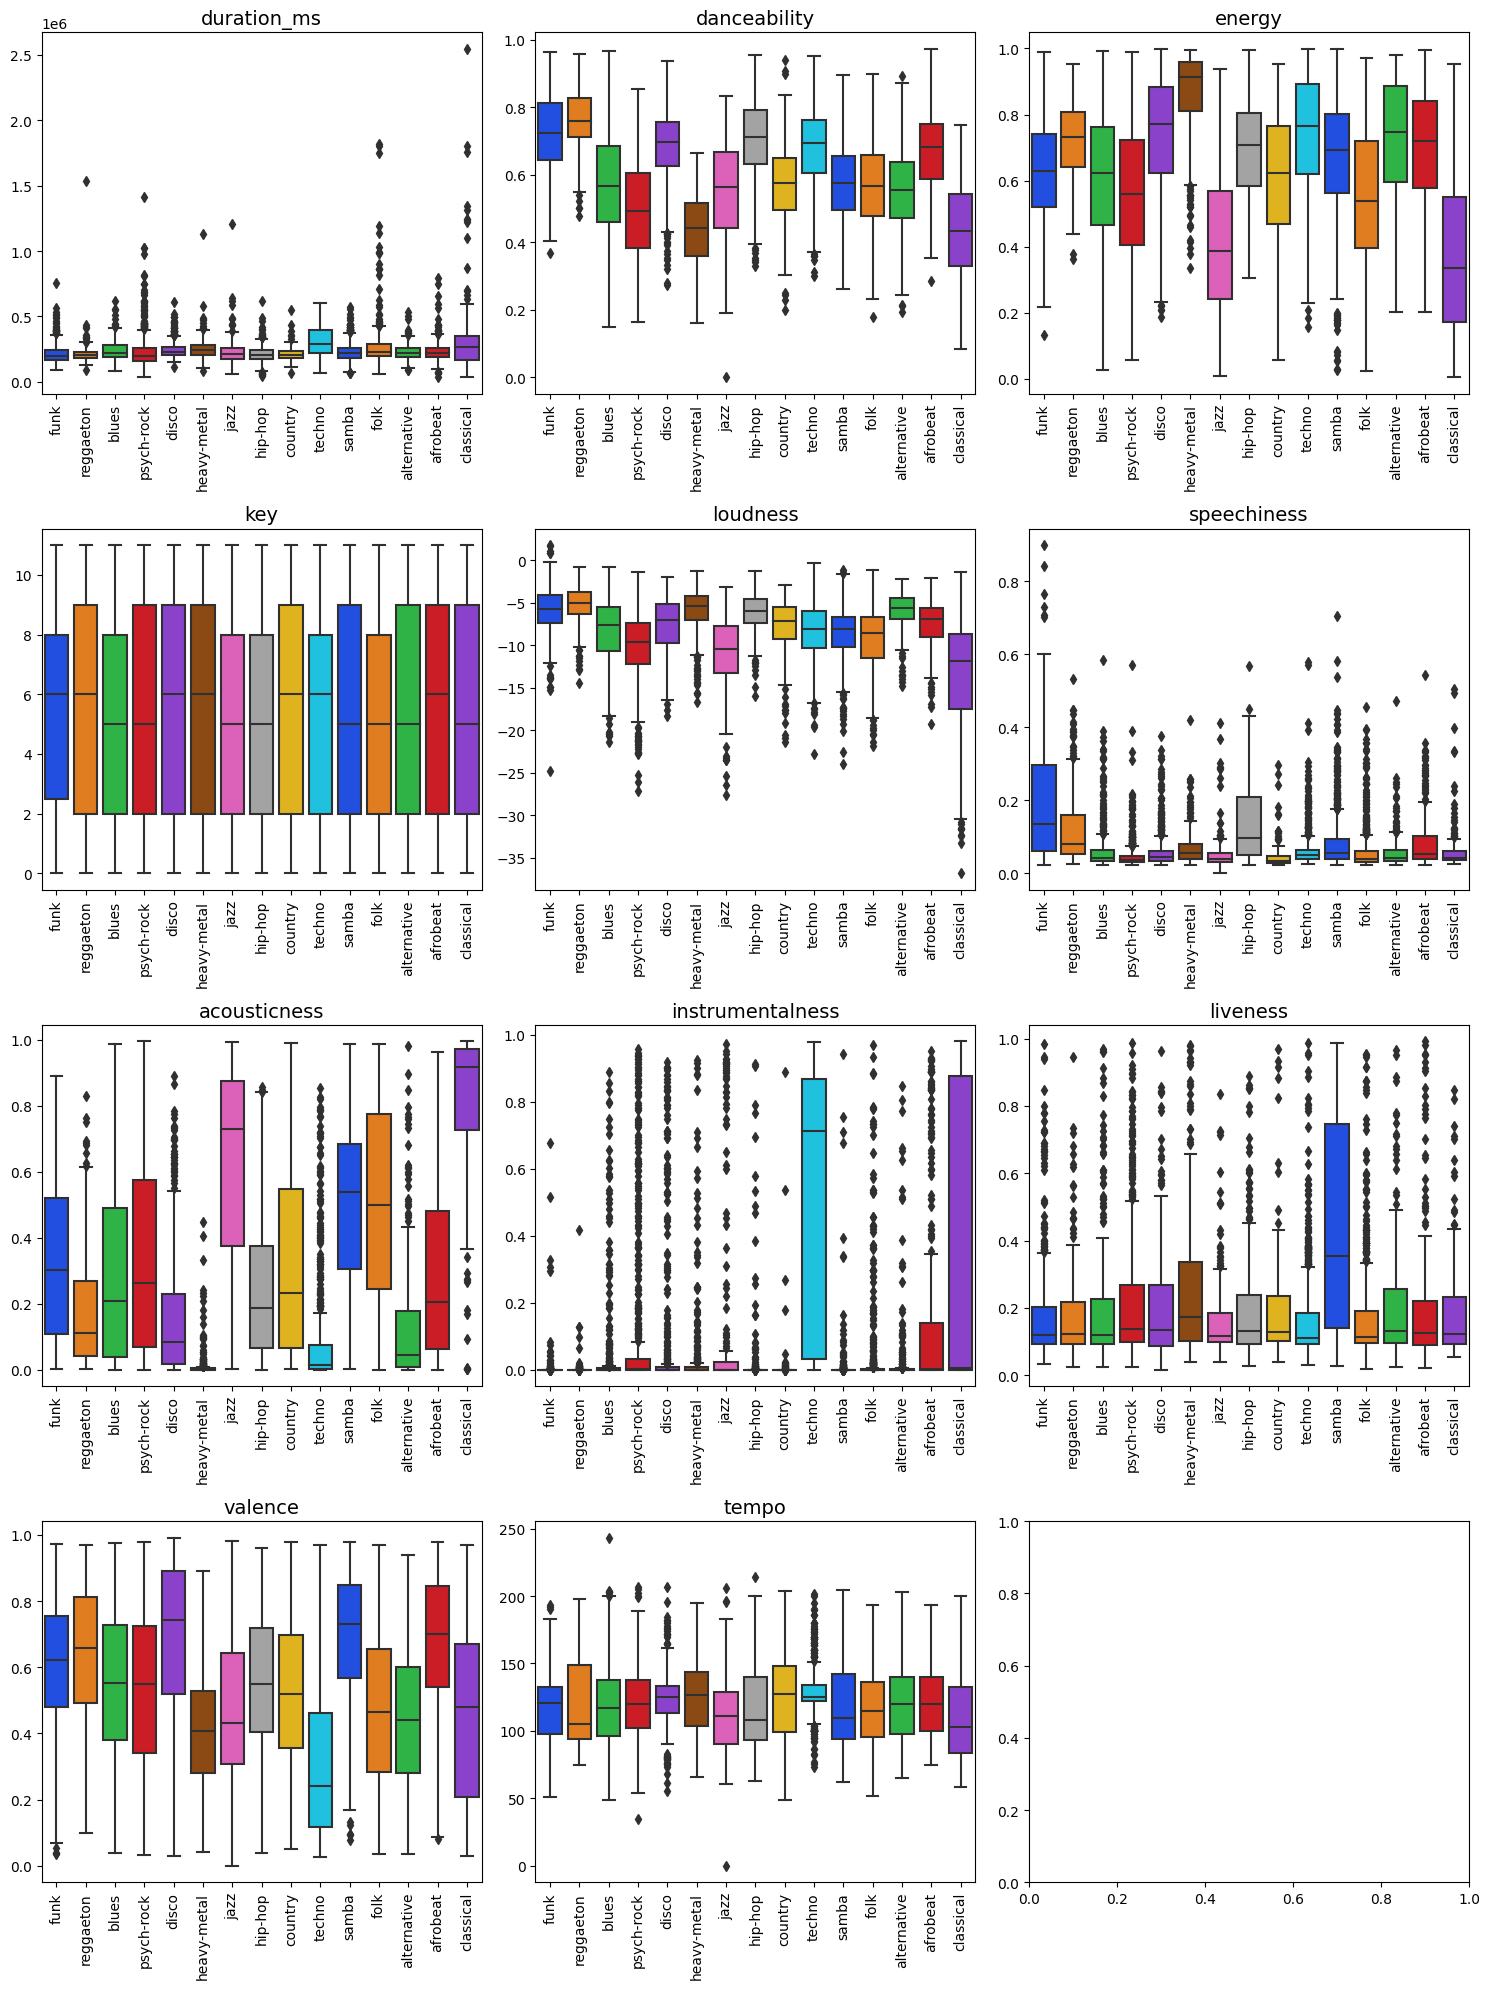

In [12]:
genres = all_train['track_genre'].unique()

# Creating colored boxplots with outliers colored based on 'track_genre'
fig, ax = plt.subplots(4, 3, figsize=(15, 20))
ax = ax.flatten()

# Use a palette that provides a distinct color for each genre
palette = sns.color_palette('bright', n_colors=len(genres))

for i, var in enumerate(variables_to_plot):
    sns.boxplot(y=all_train[var], x=all_train['track_genre'], 
                ax=ax[i], palette=palette, order=genres)
    ax[i].set_title(var, fontsize=14)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].tick_params(axis='x', rotation=90)  # Rotate x labels for better readability

plt.tight_layout()
plt.show()


In [13]:
def remove_outliers_by_genre(df, columns):
    for genre in df['track_genre'].unique():
        genre_data = df[df['track_genre'] == genre]
        for column in columns:
            Q1 = genre_data[column].quantile(0.25)
            Q3 = genre_data[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Filter out outliers
            df = df[~((df['track_genre'] == genre) & ((df[column] < lower_bound) | (df[column] > upper_bound)))]
    return df

# Apply outlier removal
all_train_clean = remove_outliers_by_genre(all_train, variables_to_plot)

# Show how many rows are left after removing outliers

print(f"con outliers {all_train.shape}")
print(f"sin outliers {all_train_clean.shape}")


con outliers (6612, 16)
sin outliers (4097, 16)


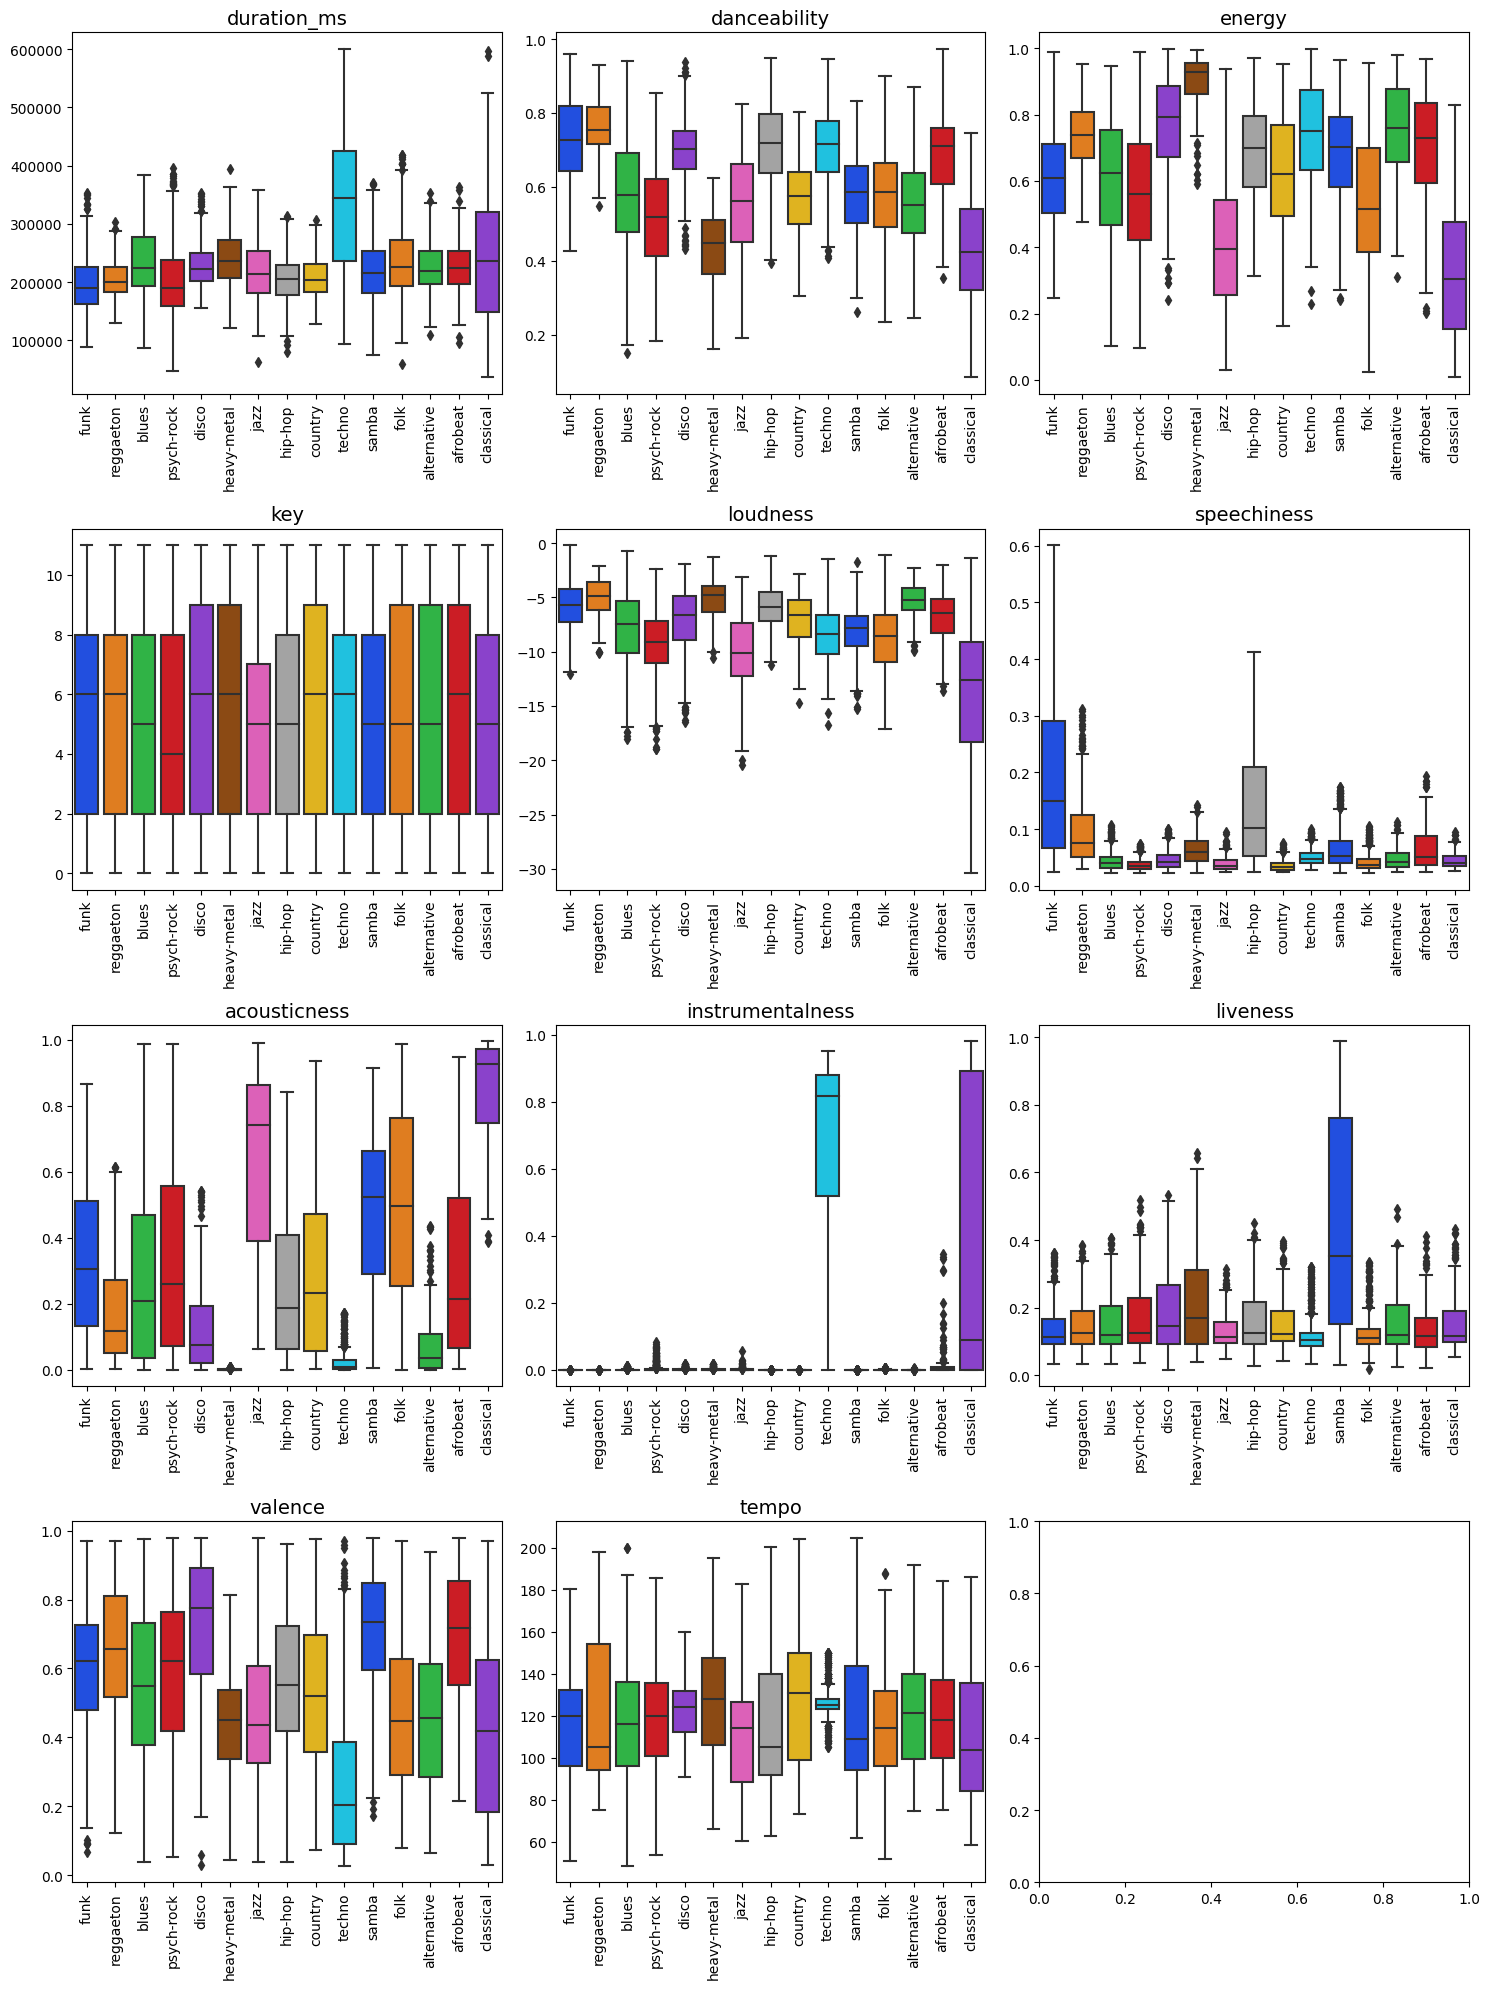

In [14]:
# Creating colored boxplots with outliers colored based on 'track_genre'
fig, ax = plt.subplots(4, 3, figsize=(15, 20))
ax = ax.flatten()

# Use a palette that provides a distinct color for each genre
palette = sns.color_palette('bright', n_colors=len(genres))

for i, var in enumerate(variables_to_plot):
    sns.boxplot(y=all_train[var], x=all_train_clean['track_genre'],
                 ax=ax[i], palette=palette, order=genres)
    ax[i].set_title(var, fontsize=14)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].tick_params(axis='x', rotation=90)  # Rotate x labels for better readability

plt.tight_layout()
plt.show()


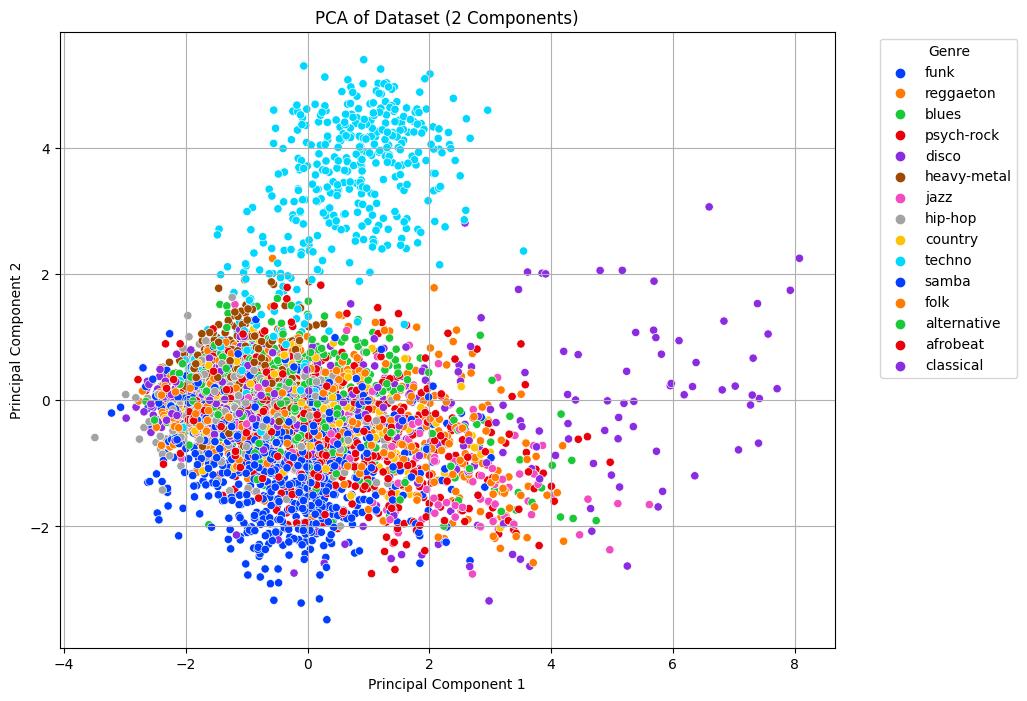

                       PC1       PC2
duration_ms       0.122328  0.523751
danceability     -0.252375  0.115057
energy           -0.525814  0.205166
key              -0.031828  0.050114
loudness         -0.535349  0.037346
speechiness      -0.204739 -0.076996
acousticness      0.381820 -0.417323
instrumentalness  0.209226  0.533967
liveness         -0.071940 -0.235765
valence          -0.329811 -0.366544
tempo            -0.108718  0.106304


In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select only numerical columns for PCA
numerical_data = all_train_clean[variables_to_plot]

# Scaling the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numerical_data)

# Applying PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(data_scaled)

# Convert PCA results to a DataFrame for easier plotting
pca_df = pd.DataFrame(data=pca_results, columns=['PC1', 'PC2'])
pca_df['track_genre'] = all_train_clean['track_genre'].values  # Add genre for coloring

# Plotting the PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='track_genre', 
                data=pca_df, palette=palette, hue_order=genres)
plt.title('PCA of Dataset (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


print(pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=variables_to_plot))

* Primera componente: peso negativo en energy y loudness, peso positivo en acousticness
* Segunda componente: peso negativo acousticness y valance, peso positivo en duration_ms y instrumentalness

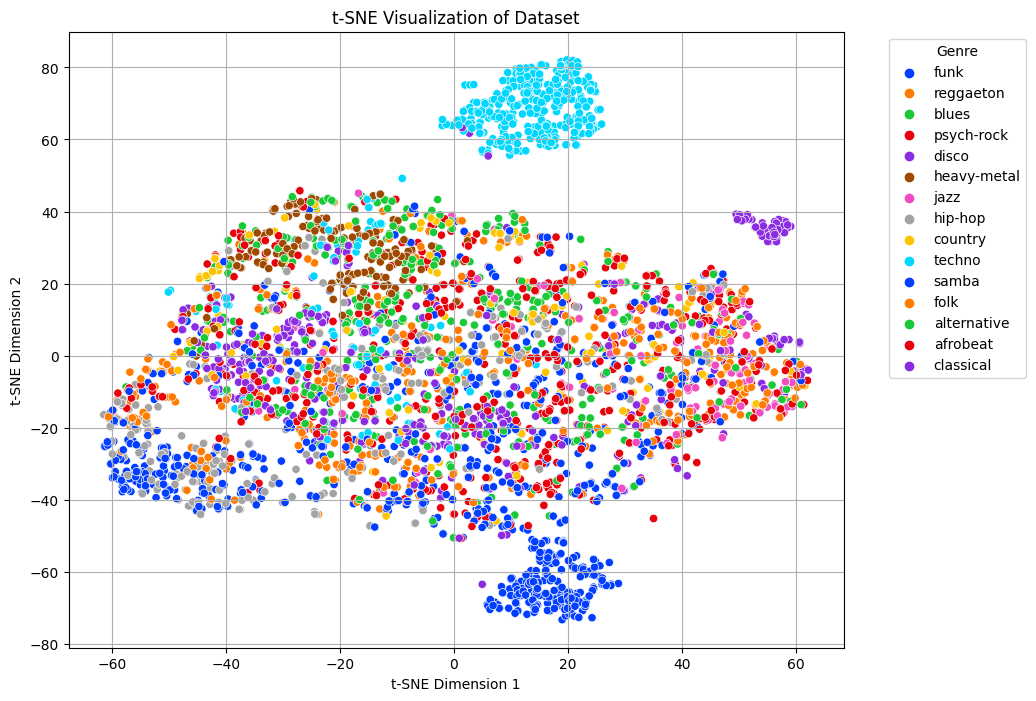

In [19]:
from sklearn.manifold import TSNE

# Applying t-SNE to reduce dimensions to 2
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(data_scaled)

# Convert t-SNE results to a DataFrame for easier plotting
tsne_df = pd.DataFrame(data=tsne_results, columns=['TSNE1', 'TSNE2'])
tsne_df['track_genre'] = all_train_clean['track_genre'].values  # Add genre for coloring

# Plotting the t-SNE results
plt.figure(figsize=(10, 8))
tsne_scatter = sns.scatterplot(x='TSNE1', y='TSNE2', hue='track_genre', data=tsne_df,
                 palette=palette, hue_order=genres)
plt.title('t-SNE Visualization of Dataset')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [27]:
# Applying t-SNE to reduce dimensions to 3, using a smaller subset to increase the chances of success
tsne_3d = TSNE(n_components=3, random_state=42, perplexity=30, learning_rate=200)
tsne_results_3d = tsne_3d.fit_transform(data_scaled)

# Convert t-SNE results to a DataFrame for easier plotting
tsne_df_3d = pd.DataFrame(data=tsne_results_3d, columns=['TSNE1', 'TSNE2', 'TSNE3'])
tsne_df_3d['track_genre'] = all_train_clean['track_genre'].values  # Add genre for coloring

# Check if the 3D data is prepared
tsne_df_3d.head()

,TSNE1,TSNE2,TSNE3,track_genre
0,-14.139962,-13.766868,11.618200,reggaeton
1,-13.775283,5.264612,1.436181,blues
2,-11.859166,10.461620,8.223786,disco
3,-8.328480,10.590666,1.234468,heavy-metal
4,5.560693,0.263542,6.048990,jazz


In [32]:
import plotly.express as px
import pandas as pd

# Assuming 'tsne_results' is your t-SNE output as a numpy array
# and 'genres' is the array of genres corresponding to each point



# Create the 3D scatter plot
fig = px.scatter_3d(tsne_df_3d, x='TSNE1', y='TSNE2', z='TSNE3',
                    color='track_genre',
                    labels={'track_genre': 'Genre'},
                    title='3D t-SNE Visualization')
fig.update_traces(marker=dict(size=5))
fig.show()


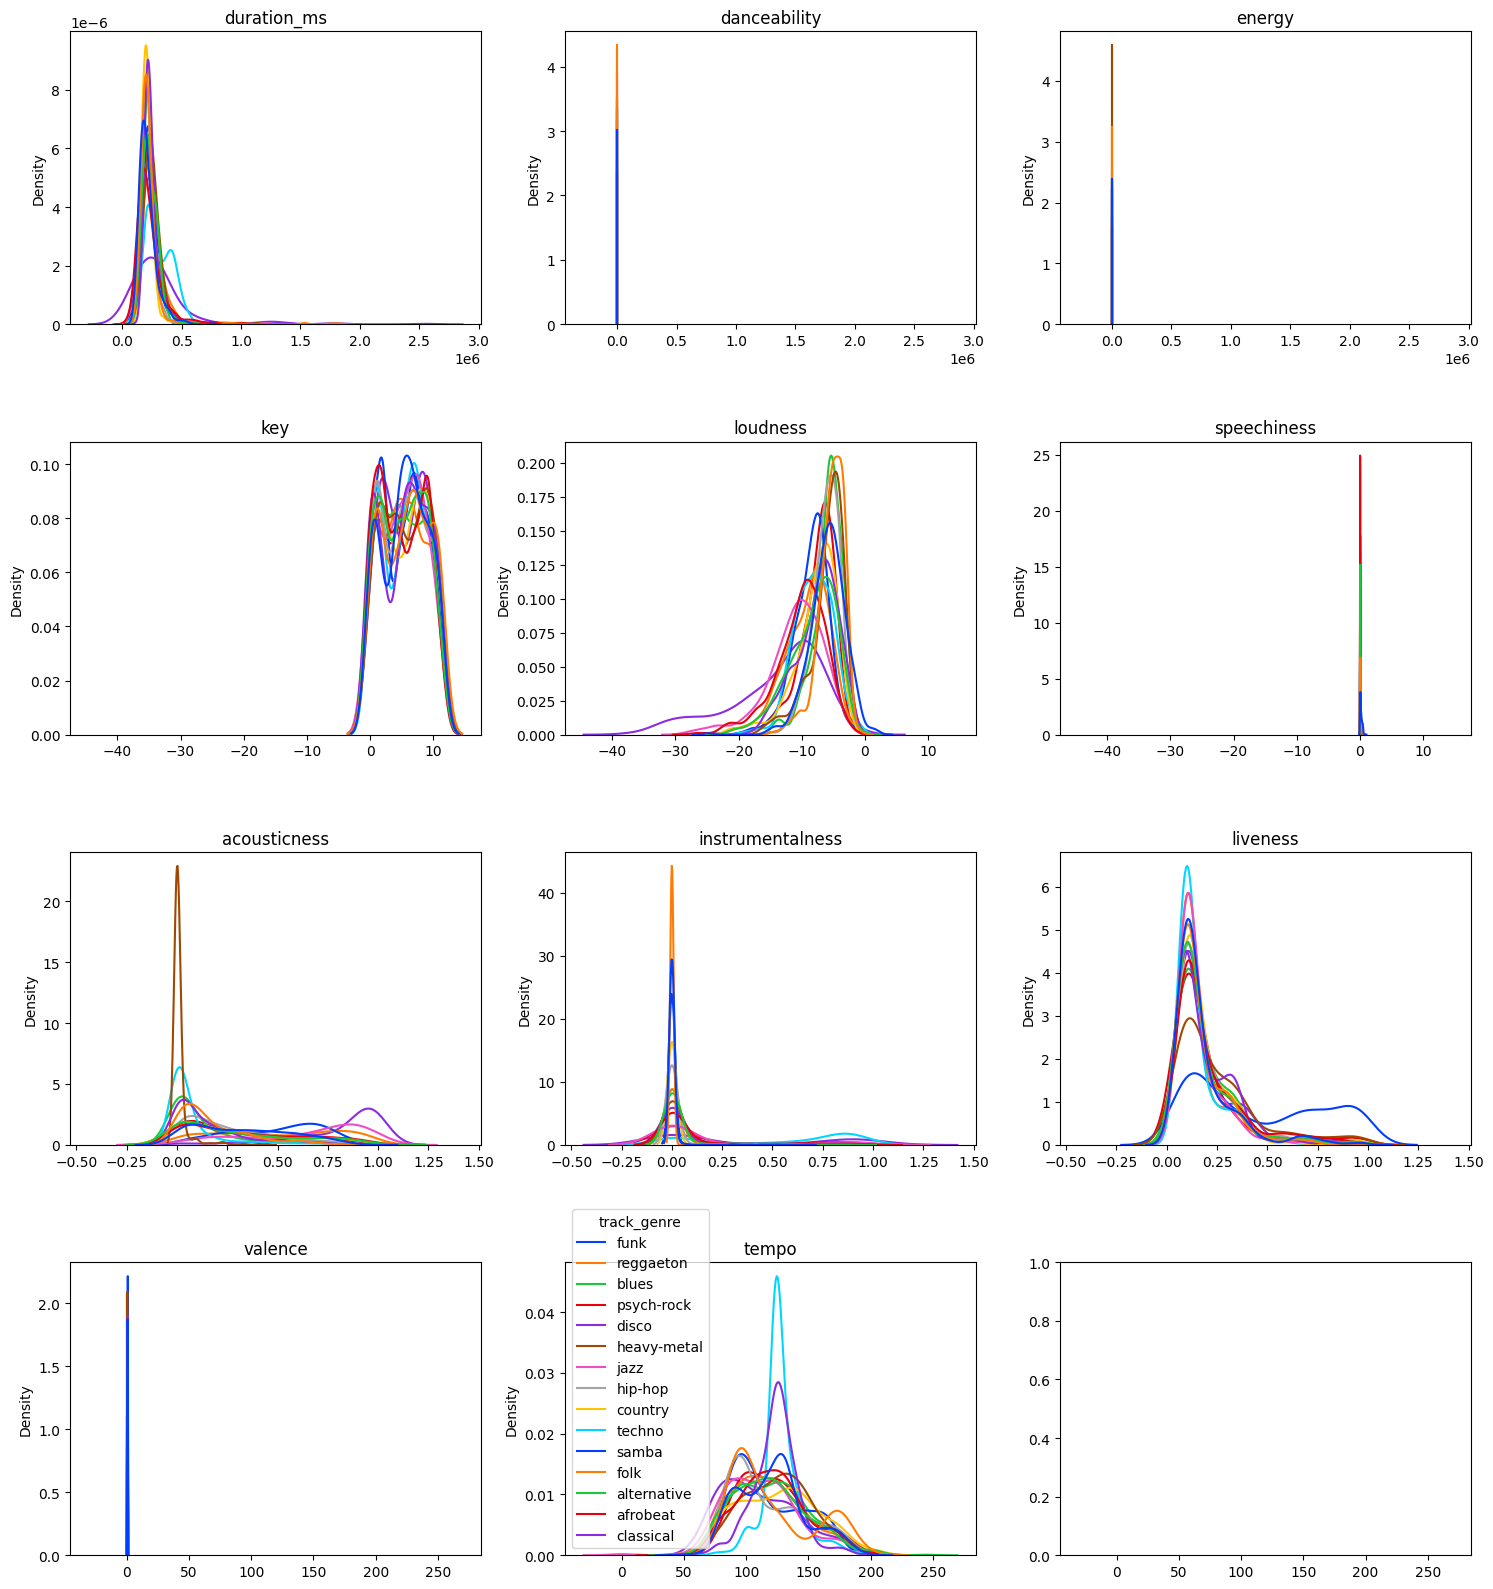

In [48]:
# Determine the size of the grid
n_vars = len(variables_to_plot)
n_cols = 3  # You can adjust the number of columns based on your preference
n_rows = (n_vars + n_cols - 1) // n_cols  # Computes the number of rows needed

# Create the grid of KDE plots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows), sharex='row')
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Create KDE plots for each variable
for i, var in enumerate(variables_to_plot):
    ax = sns.kdeplot(data=all_train, x=var, hue='track_genre',
                      palette=palette, hue_order=genres, common_norm=False, ax=axes[i])
    ax.set_title(var)
    ax.set_ylabel('Density')
    ax.set_xlabel('')
    # Remove the legend from all but the last plot
    if i < len(variables_to_plot) - 1:
        ax.get_legend().remove()

plt.tight_layout()
plt.show()

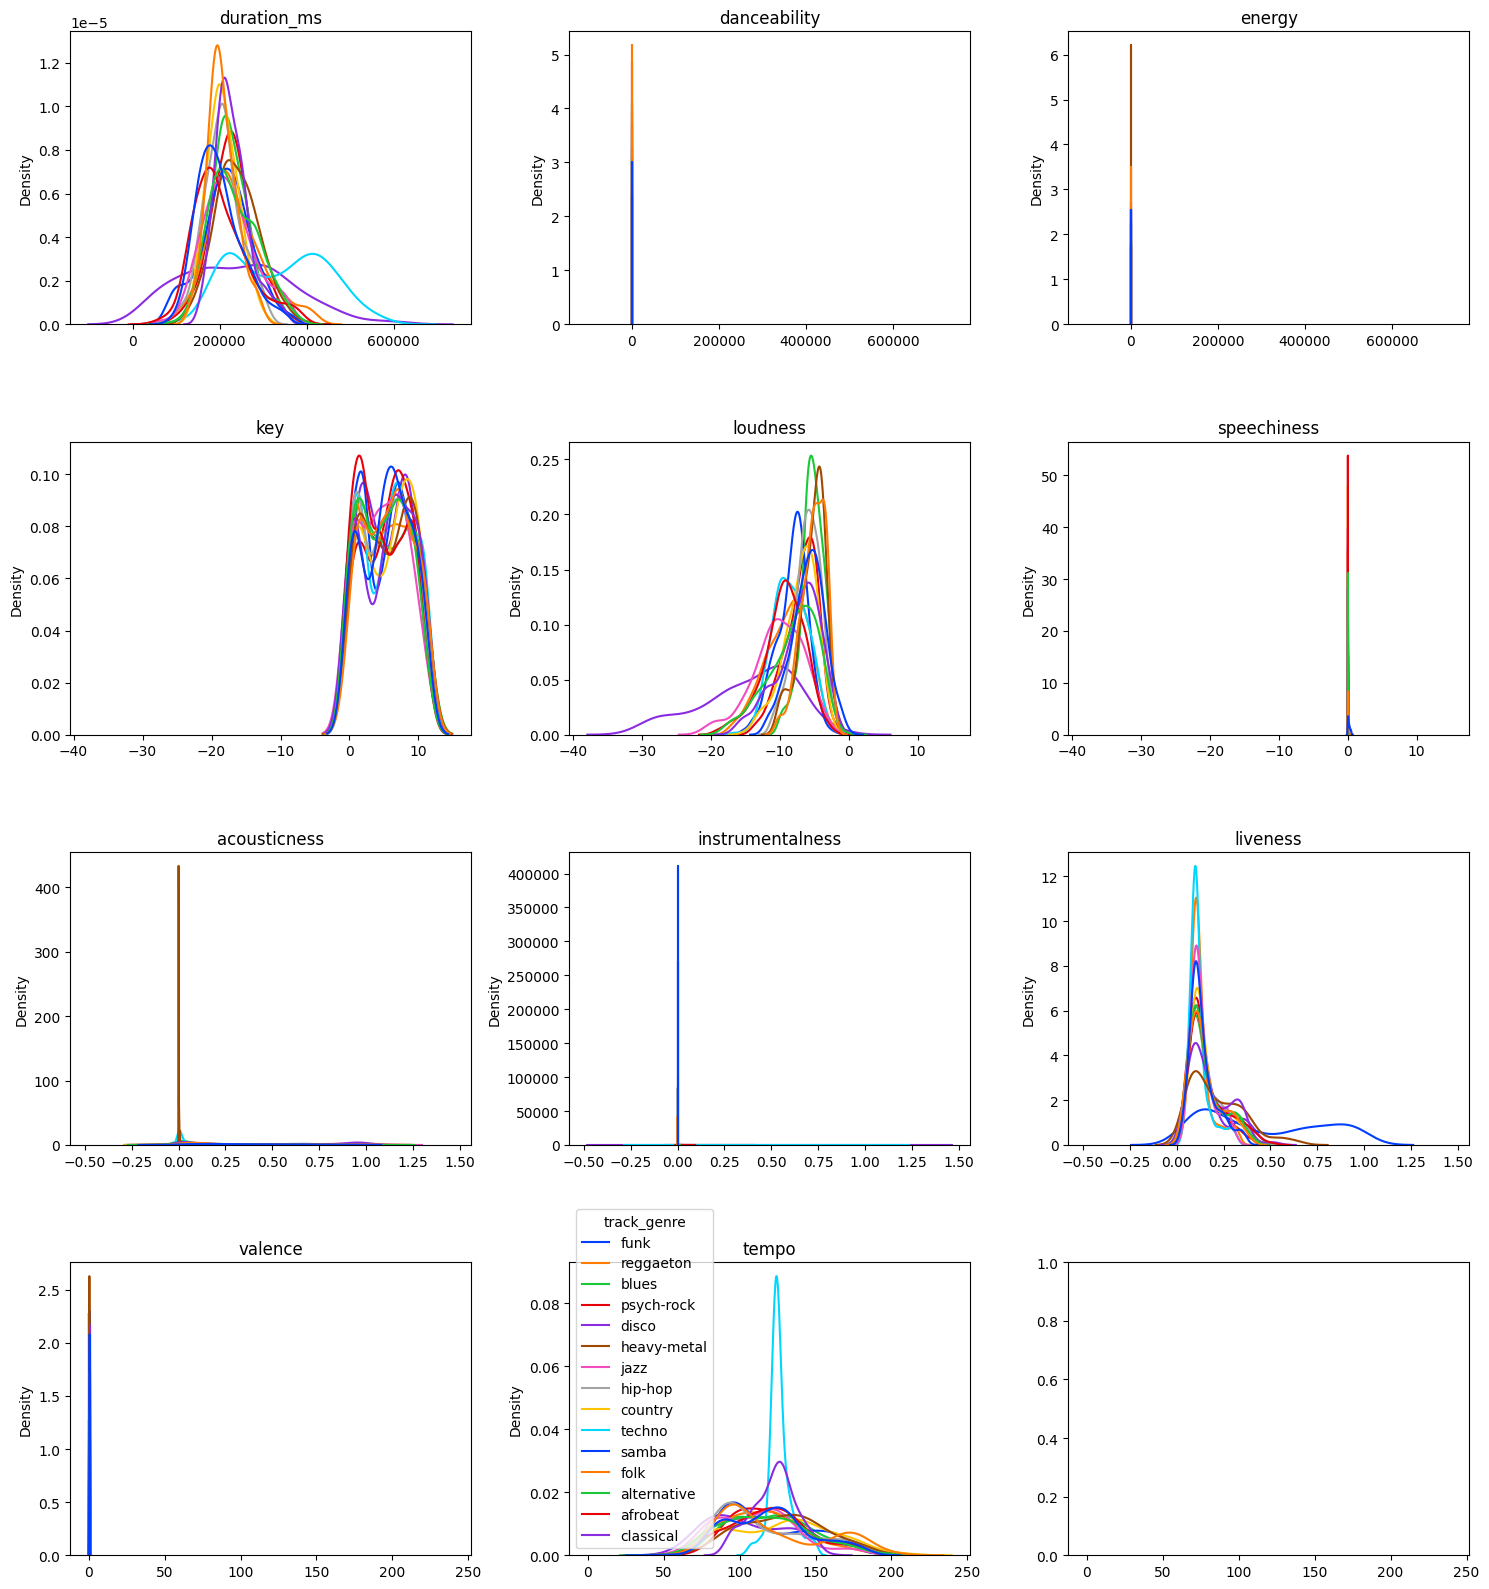

In [49]:

# Create the grid of KDE plots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows), sharex='row')
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Create KDE plots for each variable
for i, var in enumerate(variables_to_plot):
    ax = sns.kdeplot(data=all_train_clean, x=var, hue='track_genre',
                      palette=palette, hue_order=genres, common_norm=False, ax=axes[i])
    ax.set_title(var)
    ax.set_ylabel('Density')
    ax.set_xlabel('')
    # Remove the legend from all but the last plot
    if i < len(variables_to_plot) - 1:
        ax.get_legend().remove()

plt.tight_layout()
plt.show()